## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.7

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9325 - acc: 0.3067 - val_loss: 1.8139 - val_acc: 0.3484
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7471 - acc: 0.3796 - val_loss: 1.6797 - val_acc: 0.4082
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6698 - acc: 0.4078 - val_loss: 1.6968 - val_acc: 0.3981
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6053 - acc: 0.4305 - val_loss: 1.6068 - val_acc: 0.4245
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5612 - acc: 0.4484 - val_loss: 1.6347 - val_acc: 0.4162
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5255 - acc: 0.4606 - val_loss: 1.5399 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4874 - acc: 0.4736 - val_loss: 1.5421 - 

Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0150 - acc: 0.2998 - val_loss: 1.9640 - val_acc: 0.3250
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9293 - acc: 0.3282 - val_loss: 1.9006 - val_acc: 0.3369
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8769 - acc: 0.3446 - val_loss: 1.8596 - val_acc: 0.3548
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8411 - acc: 0.3565 - val_loss: 1.8310 - val_acc: 0.3639
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8137 - acc: 0.3670 - val_loss: 1.8070 - val_acc: 0.3689
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7913 - acc: 0.3743 - val_loss: 1.7843 - val_acc: 0.3794
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7713 - acc: 0.3800 - val_loss: 1.7696 - val_acc: 0.3850
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 101us/step - loss: 2.2225 - acc: 0.1877 - val_loss: 2.2125 - val_acc: 0.1996
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2013 - acc: 0.2051 - val_loss: 2.1922 - val_acc: 0.2129
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.1817 - acc: 0.2185 - val_loss: 2.1735 - val_acc: 0.2250
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.1635 - acc: 0.2289 - val_loss: 2.1561 - val_acc: 0.2388
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.1466 - acc: 0.2402 - val_loss: 2.1398 - val_acc: 0.2474
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.1308 - acc: 0.2487 - val_loss: 2.1247 - val_acc: 0.2561
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.1161 - acc: 0.2561 - val_loss: 2.1103 - val_acc: 0.2619
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 103us/step - loss: 2.3227 - acc: 0.1119 - val_loss: 2.3177 - val_acc: 0.1182
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.3134 - acc: 0.1182 - val_loss: 2.3095 - val_acc: 0.1232
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3059 - acc: 0.1242 - val_loss: 2.3026 - val_acc: 0.1270
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2995 - acc: 0.1293 - val_loss: 2.2967 - val_acc: 0.1306
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.2938 - acc: 0.1329 - val_loss: 2.2915 - val_acc: 0.1367
Epoch 9/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.2888 - acc: 0.1376 - val_loss: 2.2868 - val_acc: 0.1416
Epoch 10/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2843 - acc: 0.1430 - val_loss: 2.2825 - val_acc: 0.1453
Epoch 11/50
50000/50000 [===================

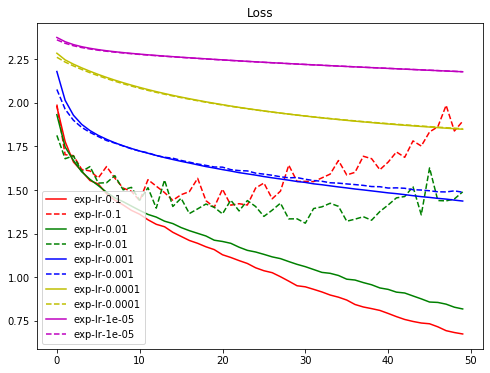

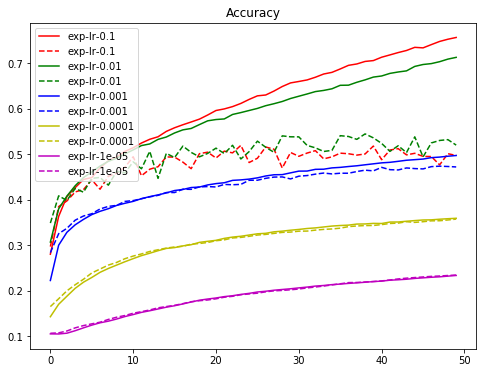

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

#### Ans
- 當momentum下降到0.7 及nesterov=False時,LR採0.1最大時在Loss及Accuracy由數值表現相對最好.